# Projektni zadatak iz predmeta "Principi prezentacije i prepoznavanja oblika"

---
**Student:** Jovana Ostojić IT64/2018


# **Segmentacija**

Segmentacija slike je metoda u kojoj se digitalna slika deli na različite podgrupe koje se nazivaju segmenti slike, što pomaže u smanjenju složenosti slike kako bi se dalja obrada ili analiza slike učinila jednostavnijom. Segmentacija jednostavnije rečeno je dodeljivanje oznaka pikselima. Svi elementi slike ili pikseli koji pripadaju istoj kategoriji imaju zajedničku oznaku koja im je dodeljena. Na primer: Uzmimo problem gde se slika mora obezbediti kao ulaz za detekciju objekata. Umesto da obrađuje celu sliku, detektoru se može uneti region odabran algoritmom za segmentaciju. Ovo će umanjiti posao detektoru na samo jedan odabrani region, čime se smanjuje vreme zaključivanja.

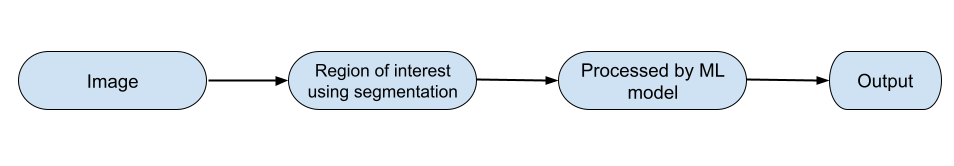


## **Tehnike segmentacije slike**


1.   Segmentacija zasnovana na pragu


> Segmentacija praga slike je jednostavan oblik segmentacije slike. To je način da se kreira binarna ili višebojna slika zasnovana na postavljanju granične vrednosti intenziteta piksela originalne slike. Kod segmentacije možemo imati jedan ili više graničnih vrednosti, pa samim tim razlikujemo segmentaciju sa jednim pragom i segmentaciju sa više pragova. Segmentacija sa jednim pragom predstavlja najjednostavniji vid segmentacije i njegova osnovna primena jeste odvajanje objekata od pozadine. Ova tehnika segmentacije se može primeniti kod izdvajanja štampanog ili pisanog teksta, **analize biomedicinskih slika**, i slično. Sa druge strane, segmentacija sa više pragova se najčešće koristi kada imamo scene sa više različitih objekata


2.   Segmentacija zasnovana na ivicama


> Segmentacija zasnovana na ivicama se oslanja na ivice koje se nalaze na slici pomoću različitih operatora za detekciju ivica. Ove ivice označavaju lokacije diskontinuiteta slike u nivoima sive, boji, teksturi itd. Kada se krećemo iz jednog regiona u drugi, nivo sive se može promeniti. Dakle, ako možemo pronaći taj diskontinuitet, možemo pronaći tu ivicu. Dostupni su različiti operatori za detekciju ivica, ali rezultujuća slika je srednji rezultat segmentacije i ne treba je mešati sa konačnom segmentiranom slikom. Moramo izvršiti dalju obradu slike da bismo je segmentirali. Dodatni koraci uključuju kombinovanje segmenata ivica dobijenih u jedan segment kako bi se smanjio broj segmenata, a ne komadi malih ivica koji bi mogli ometati proces popunjavanja regiona. Ovo se radi da bi se dobila bešavna granica objekta. Cilj segmentacije ivica je da dobijemo srednji rezultat segmentacije na koji možemo primeniti segmentaciju zasnovanu na regionu ili bilo koju drugu vrstu segmentacije da bismo dobili konačnu segmentiranu sliku.


3.   Segmentacija na osnovu regiona

> Region se može klasifikovati kao grupa povezanih piksela koji pokazuju slična svojstva. Sličnost između piksela može biti u smislu intenziteta, boje, itd. U ovoj vrsti segmentacije prisutna su neka unapred definisana pravila koja piksel mora da poštuje da bi se klasifikovao u slične regione piksela. Metode segmentacije zasnovane na regionima su poželjnije u odnosu na metode segmentacije zasnovane na ivicama u slučaju slike sa smetnjama.


4.   Segmentacija klasterizacijom


> Klasterizacija (grupisanje) je vrsta algoritma za mašinsko učenje bez nadzora. Veoma često se koristi za segmentaciju slika. Jedan od najdominantnijih algoritama zasnovanih na grupisanju koji se koristi za segmentaciju je *KMeans Clustering*. Ova vrsta grupisanja može se koristiti za pravljenje segmenata na slici u boji.







## **Set podataka**

Set podataka sastoji se iz trening i test podataka. U okviru test podataka imamo ultrazvučne snimke i maske za svaki snimak. Za svaku osobu imamo veći broj snimaka i odgovarajućih maski. Svaki snimak sa istim brojem pripada istoj osobi. Osim u formatu fotografije, maske imamo i u fajlu train_masks.csv u kodiranom formatu i tu su označeni pikseli koji obuvataju nerv. Kao što smo rekli, osim trening podataka, imamo i test podatke koji se sastoje od velikkog broja ultrazvučnih snimaka na kojima treba prepoznati nerve. 

# **Projektni zadatak**

Učitavanje dataseta

In [1]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq" -O images.zip && rm -rf /tmp/cookies.txt

--2022-09-12 17:34:59--  https://docs.google.com/uc?export=download&confirm=t&id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq
Resolving docs.google.com (docs.google.com)... 74.125.202.101, 74.125.202.113, 74.125.202.102, ...
Connecting to docs.google.com (docs.google.com)|74.125.202.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvqkqvpjq95qmc6pme81f25k6oipov89/1663004025000/06049624160957438625/*/18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq?e=download&uuid=0b3cc0a4-fac8-44e7-8c6a-14557645c406 [following]
--2022-09-12 17:34:59--  https://doc-0g-64-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/qvqkqvpjq95qmc6pme81f25k6oipov89/1663004025000/06049624160957438625/*/18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq?e=download&uuid=0b3cc0a4-fac8-44e7-8c6a-14557645c406
Resolving doc-0g-64-docs.googleusercontent.com (doc-0g-64-docs.googleusercontent.com)... 172.253.119.132,

Otpakivanje dataseta

In [2]:
!unzip images.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

U narednim koracima dodaćemo sve biblioteke potrebne za rad
> Prvo ćemo instaliramo segmentation_models_pytorch (PyTorch - framework otvorenog koda koji sadrži neuralne mreže za segmentaciju slika, zasnovan na Python i Torch bibliotekama)



In [3]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-olbpewjh
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-olbpewjh
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 376 kB 4.7 MB/s 
     |████████████████████████████████| 58 kB 7.8 MB/s 
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.0-py3-none-any.whl size=102076 sha256=1b9c0a9959d07542b0c9e46c515487e99752de71037194e9b04c58d6c6806f6f
  Stored in directory: /tmp/pip-ephem-wheel-cache-tpcjkhjq/wheels/fa/c5/a8/1e8af6cb04a0974db8a4a156ebd2fdd1d99ad2558d3fce49d4
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.7.1-py3-none-any.whl size=16446 sha256=37eac1ae8dadd0df421cbf

> Zatim dodajemo early-stopping-pytorch (Early stopping - tehnika koja će prekinuti proces onda kada se rezultati ne budu znatno poboljšavali)



In [4]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git esp

Cloning into 'esp'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), done.


Dodavanje potrebnih modula

In [5]:
import os 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

from esp.pytorchtools import EarlyStopping
import segmentation_models_pytorch as smp
import segmentation_models_pytorch.utils as smpu

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms
from PIL import Image
import pickle
from tqdm.notebook import tqdm

Definisanje putanja ka folderima sa podacima

In [6]:
train_path = 'train'
train_masks_path = 'train_masks.csv'
train_csv_path = 'train_annotation.csv'

test_path = 'test'

Iščitavanje i prikaz maski za trening

In [7]:
train_mask = pd.read_csv("train_masks.csv")
train_mask.head()

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN


Ispis informacija o fajlu sa trening maskama

In [8]:
train_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


Kako bismo koristili prethodno dodatu biblioteku Early stopping za zaustavljanje izvršavanja, potrebo je dodati funkciju koja prati validation loss. Ova funkcija sačuvaće checkpoint za model svaki put kada se validation loss smanji

In [9]:
def save_checkpoint(self, val_loss, model):
    import pickle       
    if self.verbose:
        self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f) 
    self.val_loss_min = val_loss

In [10]:
EarlyStopping.save_checkpoint = save_checkpoint

Prikaz prve slike i odgovarajuce maske za prvu osobu

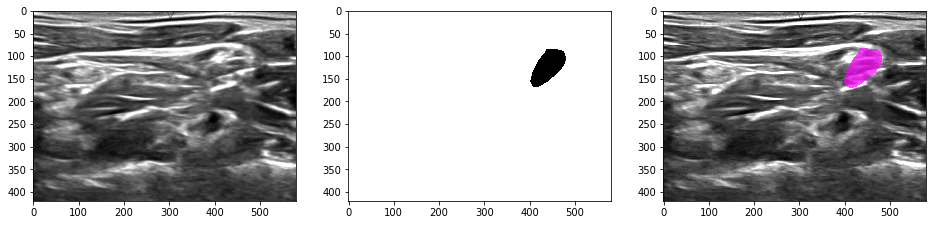

In [11]:
image1 = np.array(Image.open("train/"+"1_1.tif"))
image1_mask = np.array(Image.open("train/"+"1_1_mask.tif"))
image1_mask = np.ma.masked_where(image1_mask == 0, image1_mask)

fig, ax = plt.subplots(1,3,figsize = (16,12))
ax[0].imshow(image1, cmap = 'gray')

ax[1].imshow(image1_mask, cmap = 'gray')

ax[2].imshow(image1, cmap = 'gray', interpolation = 'none')
ax[2].imshow(image1_mask, cmap = 'spring', interpolation = 'none', alpha = 0.7)

Definisanje i pozivanje funkcije koja će u CSV fajl upisivati slike i odgovarajuće maske

In [12]:
def create_csv(data_path, out_csv_path, key_word='mask'):
    to_delete = f'_{key_word}'

    for file_name in os.listdir(data_path):
        if key_word in file_name:
            img = file_name.replace(to_delete, '')
            data = pd.DataFrame([img], index=['img']).transpose()
            data.insert(0, 'mask', file_name)

      #  else:                
            if not os.path.exists(out_csv_path):
                data.to_csv(out_csv_path, header=True, index=False)
            else:
                data.to_csv(out_csv_path, mode='a', header=False, index=False)

In [13]:
create_csv(data_path=train_path, out_csv_path=train_csv_path)

Iščitavanje i prikaz prethodno kreiranog CSV fajla sa slikama i odgovarajućim maskama

In [14]:
train_df = pd.read_csv(train_csv_path)
train_df.head() 

,mask,img
0,29_119_mask.tif,29_119.tif
1,36_23_mask.tif,36_23.tif
2,6_53_mask.tif,6_53.tif
3,46_54_mask.tif,46_54.tif
4,38_112_mask.tif,38_112.tif


Kreiranje Dataseta za model. U dataset smeštamo slike i odgovarajuće maske za trening

In [15]:
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
       
        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))  
    
        if self.transform:
            return self.transform(image), self.transform(mask)
    
        return image, mask

In [16]:
train_samples = ImageDataset(df=train_df, root_dir=train_path)

Definisanje i pozivanje funkcije koja će prikazati nekoliko primera slika i odgovarajućih maski

In [17]:
def draw_samples(data, n_col, n_row):
    fig = plt.figure(figsize=(20, 5))
        
    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)
        
        img_ax.imshow(data[i-1][0], cmap="gray")
        msk_ax.imshow(data[i-1][1], cmap="gray")
        
    fig.show()

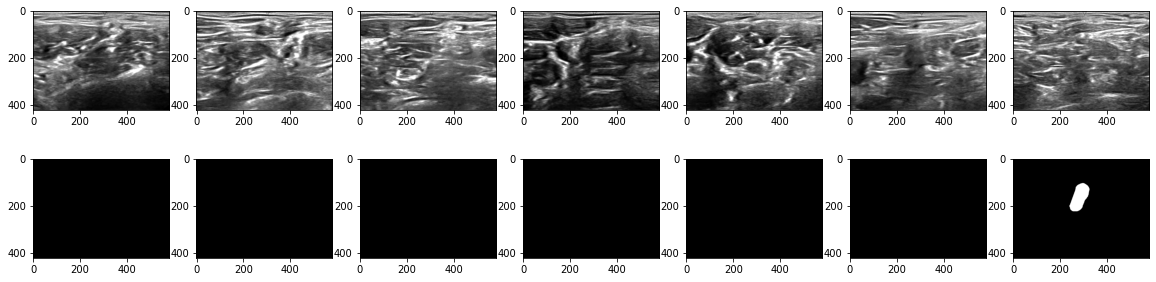

In [18]:
draw_samples(data=train_samples, n_col = 7, n_row = 2)

Postavljanje potrebnih parametara za segmentation_model_pytorch

In [19]:
ENCODER = 'vgg11_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Definisanje U-Net (U-Net je konvoluciona neuronska mreža koja je razvijena za segmentaciju biomedicinskih slika)

In [20]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

Postavljanje različitih metrika 

In [21]:
loss = smpu.losses.DiceLoss() #ne sme biti preko 1
metrics = [smp.utils.metrics.IoU()] #treba da bude što bliže 1
optimizer = torch.optim.Adam #optimizator za LR (Learning Rate)
scheduler = lr_scheduler.StepLR #prilagođava LR između epoha (iteracija)

Transformisanje slike 

In [22]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor() #transformiše iz PIL image u PyTorch FloatTensor
])

Podela data frame-a

In [23]:
def split_df(df, fraction=0.8):  
    df_1 = df.sample(frac=fraction)
    return df_1, df.drop(df_1.index)

Treniranje modela


> Obučavanje modela kako bi što uspešnije izvršio segmentaciju



In [24]:
def train(model, train_df, train_dir, optimizer, loss, metrics, 
          learning_rate=0.01, batch_size=20, epochs=10, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):   
    
    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma) 

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )
    
    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    ) 
    
    train_logs, valid_logs = [], []
    
    for epoch in range(epochs):   
        train_dataframe, val_dataframe = split_df(train_df) 
          
        train_dataset = ImageDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = ImageDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=True)    

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=False)        

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)
        
        train_logs.append(train_log)
        valid_logs.append(valid_log)
   
        early_stopping(valid_log[loss.__name__], model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

In [25]:
res = train(model=model,
            train_df=train_df, 
            train_dir=train_path, 
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=20,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE, 
            transform=my_transforms)


Epoch: 1/20
valid: 100%|██████████| 226/226 [01:00<00:00,  3.71it/s, dice_loss - 0.4342, iou_score - 0.4008]
Validation loss decreased (inf --> 0.434248).  Saving model ...

Epoch: 2/20
valid: 100%|██████████| 226/226 [01:01<00:00,  3.67it/s, dice_loss - 0.5156, iou_score - 0.3287]
EarlyStopping counter: 1 out of 3

Epoch: 3/20
valid: 100%|██████████| 226/226 [01:01<00:00,  3.65it/s, dice_loss - 0.388, iou_score - 0.4471]
Validation loss decreased (0.434248 --> 0.387983).  Saving model ...

Epoch: 4/20
valid: 100%|██████████| 226/226 [01:02<00:00,  3.64it/s, dice_loss - 0.3844, iou_score - 0.4508]
Validation loss decreased (0.387983 --> 0.384385).  Saving model ...

Epoch: 5/20
valid: 100%|██████████| 226/226 [01:01<00:00,  3.67it/s, dice_loss - 0.429, iou_score - 0.4062]
EarlyStopping counter: 1 out of 3

Epoch: 6/20
valid: 100%|██████████| 226/226 [01:01<00:00,  3.69it/s, dice_loss - 0.3836, iou_score - 0.4512]
Validation loss decreased (0.384385 --> 0.383568).  Saving model ...

Ep

Prikaz rezultata treniranja

In [26]:
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [27]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [28]:
train_logs_df = pd.DataFrame(res[0])
valid_logs_df = pd.DataFrame(res[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

Definisanje i pozivanje funkcije za crtanje grafički prikaz rezultata

In [29]:
def draw_graphic(df_dict, title, criteria, xlab, ylab, colors=['y', 'c'], 
                 legend_loc='best', figsize=(12, 8), fontsize=14):
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(df_dict):
        plt.plot(df_dict[key].index.tolist(), df_dict[key][criteria].tolist(), colors[i], lw=3, label=key)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=fontsize)
    plt.grid()
    
    fig.show() 

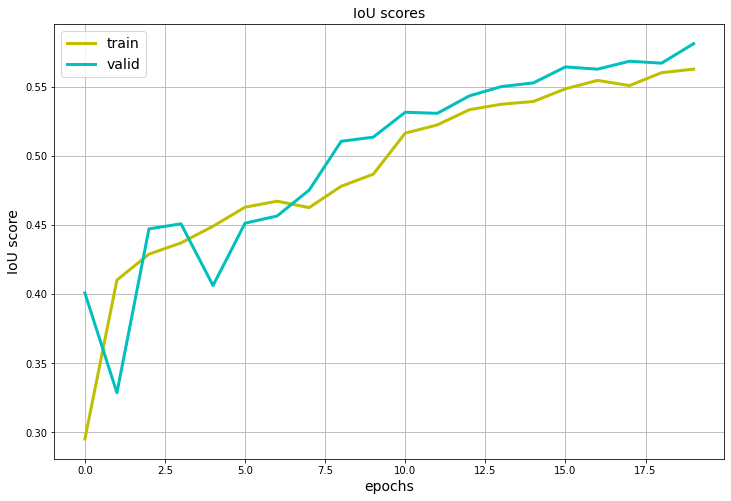

In [30]:
draw_graphic(df_dict=res_dict, title='IoU scores', criteria='iou_score', xlab='epochs', ylab='IoU score')

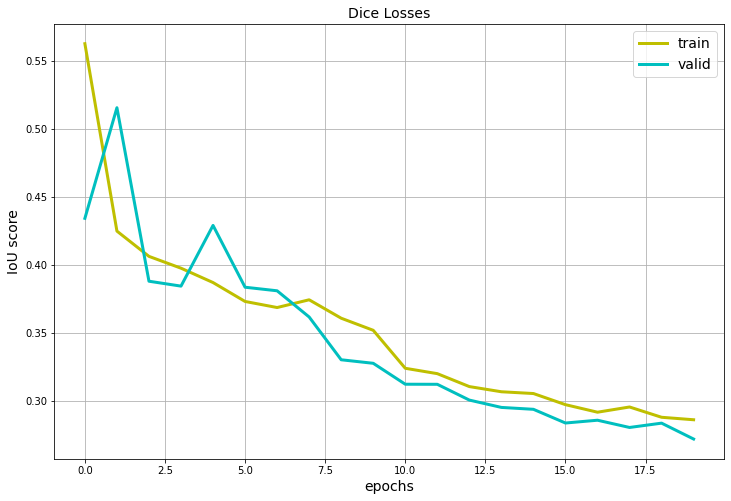

In [31]:
draw_graphic(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')

Testiranje modela nad test podacima

In [32]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [33]:
imgs = [f for f in os.listdir(test_path)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

Definisanje i pozivanje funkcije koja će u CSV fajl upisivati podatke o tome da li se na fotografiji nalazi nerv ili ne, a sve to u odnosu na prethodno istreniran model

In [34]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()
    
    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = my_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [35]:
create_csv_submission(model=model, 
                      data_path=test_path, 
                      img_list=imgs,
                      out_path='submission.csv')

  0%|          | 0/5508 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  


Iščitavanje i prikaz submission fajla

In [36]:
test_res = pd.read_csv("submission.csv")
test_res.head()

,img,pixels
0,1,108484 4 108904 5 109316 2 109319 2 109322 11 ...
1,2,112344 1 112346 1 112759 28 113179 28 113598 3...
2,3,NaN
3,4,NaN
4,5,109412 11 109831 13 110250 14 110661 8 110670 ...
